In [ ]:
# This notebook tests different bits and pieces that will go into the Fizeau control loop

# created 2018 June 26 by E.S.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy.ma as ma
from scipy import misc, signal
from astropy.io import fits
#from lmircam_tools import junk_process_readout
#% matplotlib inline

In [3]:
# set some approximate parameters of the observed grism PSF

sig = 5 # sigma of Gaussian profile in x
length_y = 200 # length in y of the psf

In [4]:
# get background

imagebgCube, header = fits.getdata('./fits_files/lm_181223_'+str("{:0>6d}".format(1373))+'.fits',0,header=True)
imagebg = imagebgCube[0,:,:]

In [5]:
#####################################################
# THE PART BELOW IS NEW

In [6]:
# take FFT
# if no direction of fringes is apparent --> dial one way 10 microns, then jump back and go the other way 10 microns
# if direction of fringes is apparent --> dial OPD to make them vertical

In [7]:
from matplotlib.colors import LogNorm

In [8]:
# ersatz
center_grism = [639,940]

In [9]:
# loop over sequence of grism images to make animation of how the FFT of the grism PSF changes

'''
for f in range(6950,7049):

    image, header = fits.getdata('images/lm_180507_'+
                                 str("{:0>6d}".format(f))+
                                 '.fits',
                                 0,
                                 header=True) 

    # cut out the grism image
    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),
                                     center_grism[1]-2*sig:center_grism[1]+2*sig]
    
    
    # take FFT
    
    # w/ padding
    #padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),'constant',constant_values=10) 
    # no padding
    padI = img_before_padding_before_FT

    PhaseExtract = np.fft.fft2(padI)
    PhaseExtract = np.fft.fftshift(PhaseExtract)

    AmpPE = np.absolute(PhaseExtract)
    ArgPE = np.angle(PhaseExtract)

    plt.subplot(1, 3, 1)
    plt.imshow(img_before_padding_before_FT, origin="lower", cmap="gray")   
    
    plt.subplot(1, 3, 2)
    plt.imshow(AmpPE, origin="lower", cmap="gray", norm=LogNorm())
    
    #plt.subplot(1, 4, 3)
    #plt.plot(np.sum(AmpPE, axis=1))
    
    plt.subplot(1, 3, 3)
    plt.semilogy(np.sum(AmpPE[:,int(0.5*img_before_padding_before_FT.shape[1]):], axis=1)) # use right-hand side of FFT image only    
    
    #frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    
    #plt.tight_layout()
    
    plt.suptitle(str("{:0>6d}".format(f)))
    
    #plt.show()
    
    plt.savefig("images/psf_altair_ft_"+str("{:0>6d}".format(f))+".png", overwrite=False)
    plt.clf()
'''

'\nfor f in range(6950,7049):\n\n    image, header = fits.getdata(\'images/lm_180507_\'+\n                                 str("{:0>6d}".format(f))+\n                                 \'.fits\',\n                                 0,\n                                 header=True) \n\n    # cut out the grism image\n    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),\n                                     center_grism[1]-2*sig:center_grism[1]+2*sig]\n    \n    \n    # take FFT\n    \n    # w/ padding\n    #padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),\'constant\',constant_values=10) \n    # no padding\n    padI = img_before_padding_before_FT\n\n    PhaseExtract = np.fft.fft2(padI)\n    PhaseExtract = np.fft.fftshift(PhaseExtract)\n\n    AmpPE = np.absolute(PhaseExtract)\n    ArgPE = np.angle(PhaseExtract)\n\n    plt.subplot(1, 3, 1)\n    plt.imshow(img_before_padding_before_FT, origin="lower", cmap

In [10]:
image, header = fits.getdata('./fits_files/lm_181223_'+str("{:0>6d}".format(1374))+'.fits',0,header=True)

In [11]:
np.shape(image[0,:,:])

(1024, 2048)

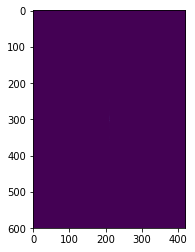

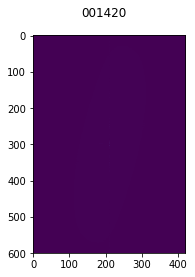

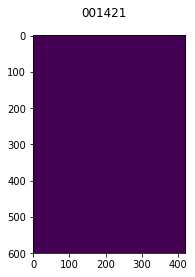

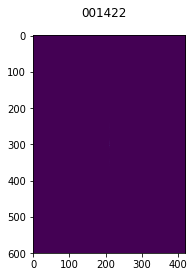

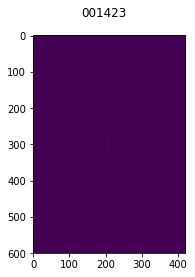

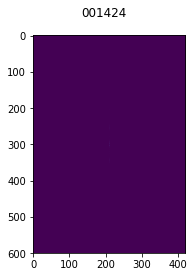

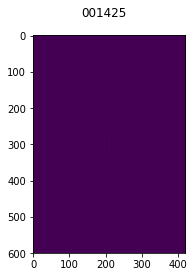

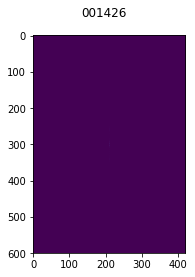

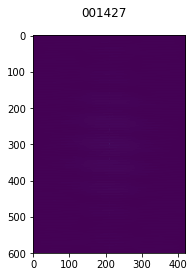

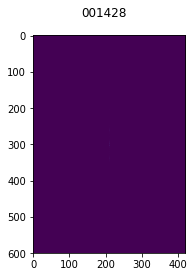

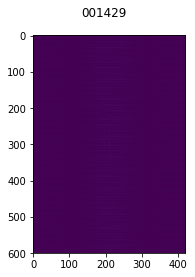

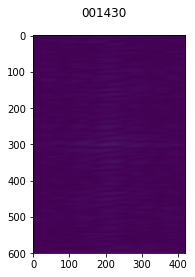

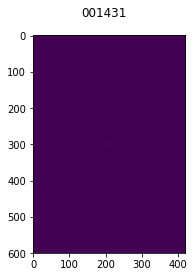

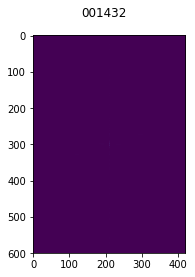

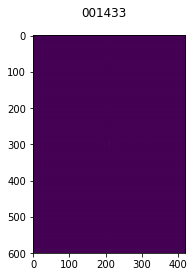

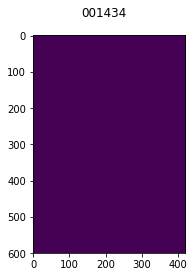

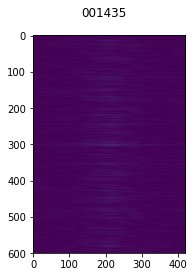

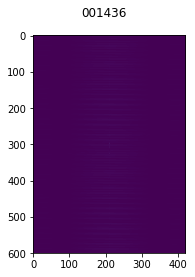

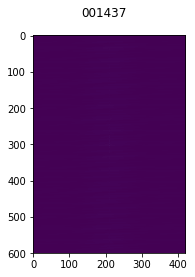

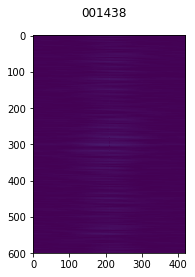

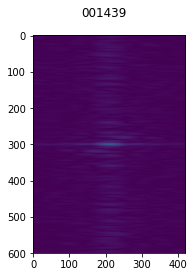

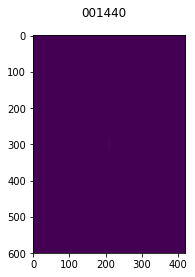

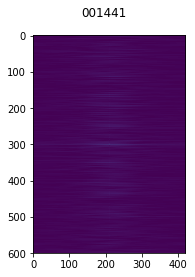

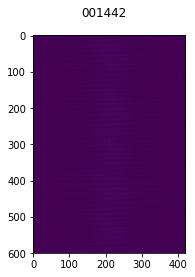

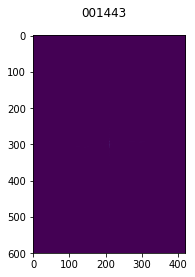

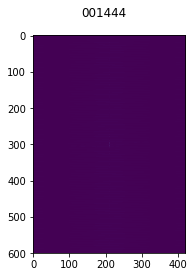

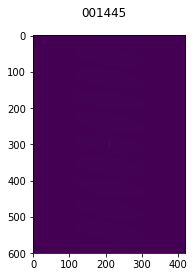

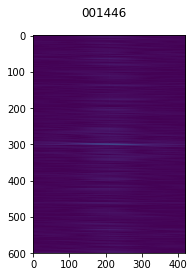

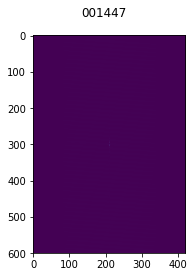

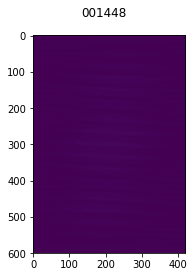

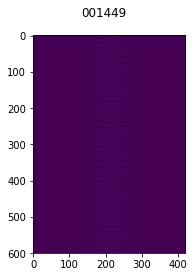

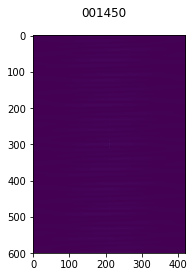

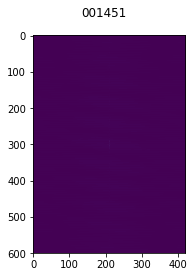

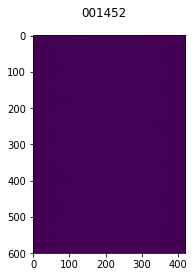

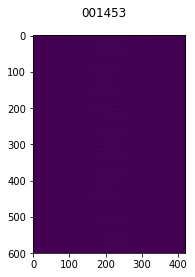

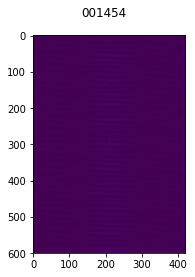

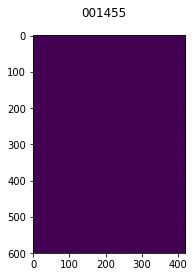

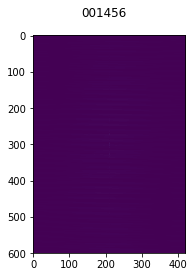

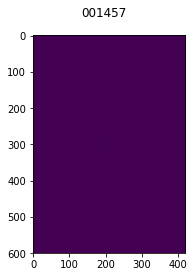

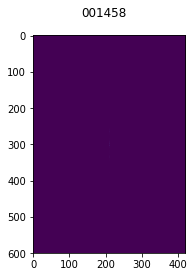

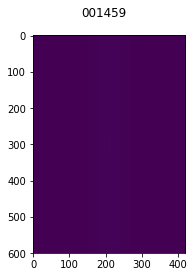

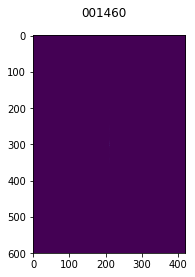

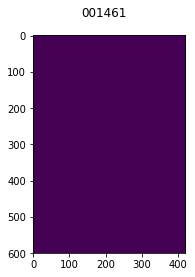

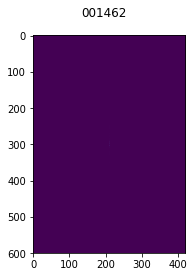

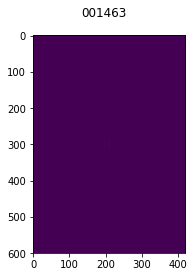

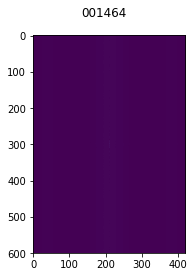

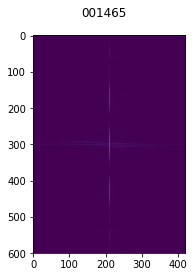

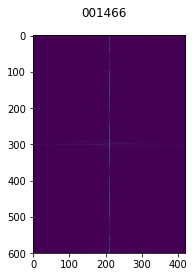

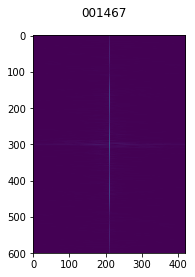

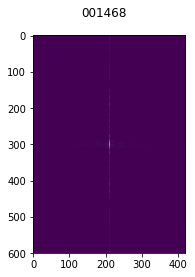

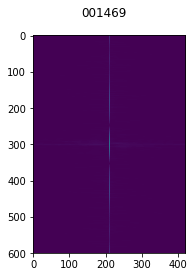

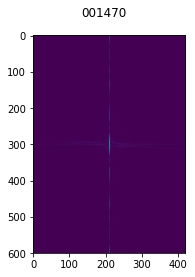

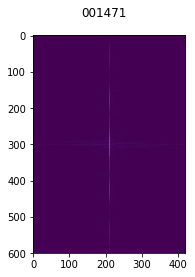

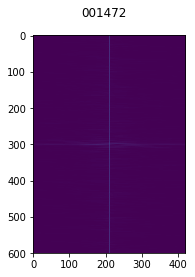

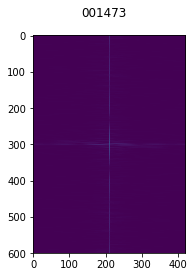

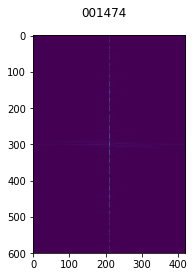

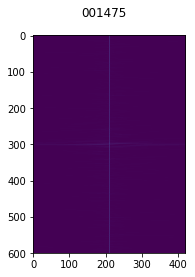

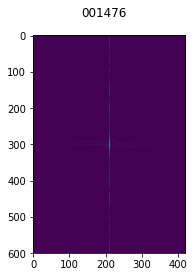

<Figure size 432x288 with 0 Axes>

In [22]:
# loop over sequence of grism images to make animation of how the residuals of parts of the FFT of the grism PSF changes 

testArray = []
frameArray = []
plArray = []

for f in range(1420,1478):
#for f in range(1374,1414):

    imageCube, header = fits.getdata('fits_files/lm_181223_'+str("{:0>6d}".format(f))+'.fits',
                                 0,
                                 header=True) 
    
    imgb4 = imageCube[0,:,:]
    
    # simple background subtraction
    image = np.subtract(imgb4,imagebg)

    # cut out the grism image
    img_before_padding_before_FT = image[center_grism[0]-int(0.5*length_y):center_grism[0]+int(0.5*length_y),
                                     center_grism[1]-2*sig:center_grism[1]+2*sig]
    
    
    # take FFT
    
    # w/ padding
    padI = np.pad(img_before_padding_before_FT,int(len(img_before_padding_before_FT)),'median') 
    # no padding
    #padI = img_before_padding_before_FT

    PhaseExtract = np.fft.fft2(padI)
    PhaseExtract = np.fft.fftshift(PhaseExtract)

    AmpPE = np.absolute(PhaseExtract)
    ArgPE = np.angle(PhaseExtract)
    
    plt.imshow(AmpPE)
    plt.show()
    
    #plt.tight_layout()
    
    plt.suptitle(str("{:0>6d}".format(f)))
    
    # testing
    to_corr = np.sum(AmpPE[:,int(0.5*img_before_padding_before_FT.shape[1]):], axis=1)
    to_corr_masked = np.copy(to_corr)
    to_corr_masked[98:102] = 0
    test_symm = signal.correlate(to_corr_masked, to_corr_masked[::-1], mode='same')
    
    leftHalf = test_symm[:int(0.5*len(test_symm))]
    rightHalf = test_symm[int(0.5*len(test_symm)):]
    resid = leftHalf-rightHalf[::-1]
    #plt.plot(resid)
    frameArray = np.concatenate((frameArray,[f]))
    testArray = np.concatenate((testArray,[np.median(resid)]))
    plArray = np.concatenate((plArray,[int(header['SPCTRPOS'])]))
    #plt.show()
    
    #plt.savefig("images/psf_altair_corr2_"+str("{:0>6d}".format(f))+".png", overwrite=False)
    #plt.clf()

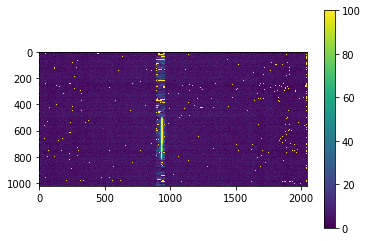

In [54]:
plt.imshow(image, vmin=0, vmax=100)
plt.colorbar()
plt.show()

In [21]:
testArray

array([4.23465550e+09, 4.23465550e+09, 4.23465550e+09, 3.67055934e+09,
       3.98449236e+09, 3.66705996e+09, 3.43183365e+09, 3.06523996e+09])

In [22]:
plArray

array([399000., 399250., 399500., 399750., 400000., 400250.])

In [123]:
coeffs = np.polyfit(plArray,testArray, 2)

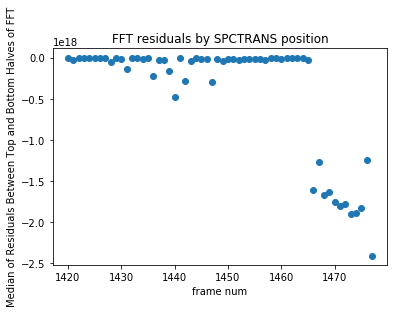

In [24]:
plt.scatter(frameArray,testArray)
#plt.plot(plArray, coeffs[2] + coeffs[1]*plArray+coeffs[0]*plArray**2)
plt.title('FFT residuals by SPCTRANS position')
plt.xlabel('frame num')
plt.ylabel('Median of Residuals Between Top and Bottom Halves of FFT')
#plt.axvline([1398])
#plt.ylim(-1e13,1e13)
#plt.show()
plt.savefig('test_2_ut23dec.png')